In [45]:
import torch
import matplotlib.pyplot as plt

In [46]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

learning_rate = torch.tensor(0.001)

In [47]:
class RegressionModel:
    def __init__(self):
        self.w = torch.tensor(1., requires_grad=True)
        self.b = torch.tensor(1., requires_grad=True)

    def forward(self, x):
        return self.w * x + self.b

    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj, y_p):
    return (yj - y_p)**2

The parameters are w=5.170400619506836, b=1.2899999618530273 and loss=25359.80078125
The parameters are w=12.769421577453613, b=1.8462798595428467 and loss=486.63970947265625
The parameters are w=12.867484092712402, b=1.8869833946228027 and loss=482.1866760253906
The parameters are w=12.866495132446289, b=1.9207613468170166 and loss=482.07171630859375
The parameters are w=12.864205360412598, b=1.9543311595916748 and loss=481.958740234375
The parameters are w=12.861907005310059, b=1.987782597541809 and loss=481.84625244140625
The parameters are w=12.85961627960205, b=2.0211167335510254 and loss=481.7345275878906
The parameters are w=12.85733413696289, b=2.0543339252471924 and loss=481.6238708496094
The parameters are w=12.855058670043945, b=2.087435007095337 and loss=481.51361083984375
The parameters are w=12.852792739868164, b=2.120420217514038 and loss=481.40411376953125


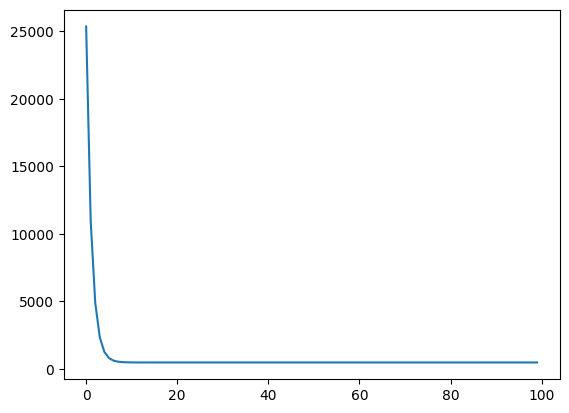

In [48]:
model = RegressionModel()

loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j], y_p)

    loss /= len(x)
    loss_list.append(loss.item())
    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()

    if epochs%10==0:
        print('The parameters are w={}, b={} and loss={}'.format(model.w, model.b, loss.item()))

plt.plot(loss_list)
plt.show()